<img src="logo.jpg" />

## [Pedram Jahangiry, Fall 2019](www.pedramjahangiry.com) 

# K Nearest Neigbors (KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
rand_state = 350

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


## Data preprocessing 

In [7]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID',axis=1, inplace=True)

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [11]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender_Male']]

In [12]:
df.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


## Data visualization 

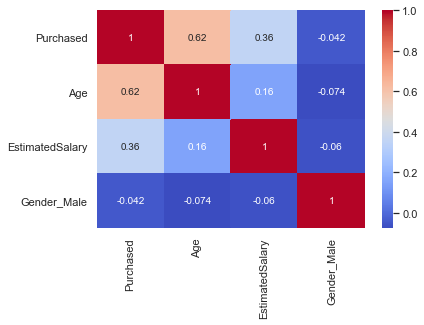

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

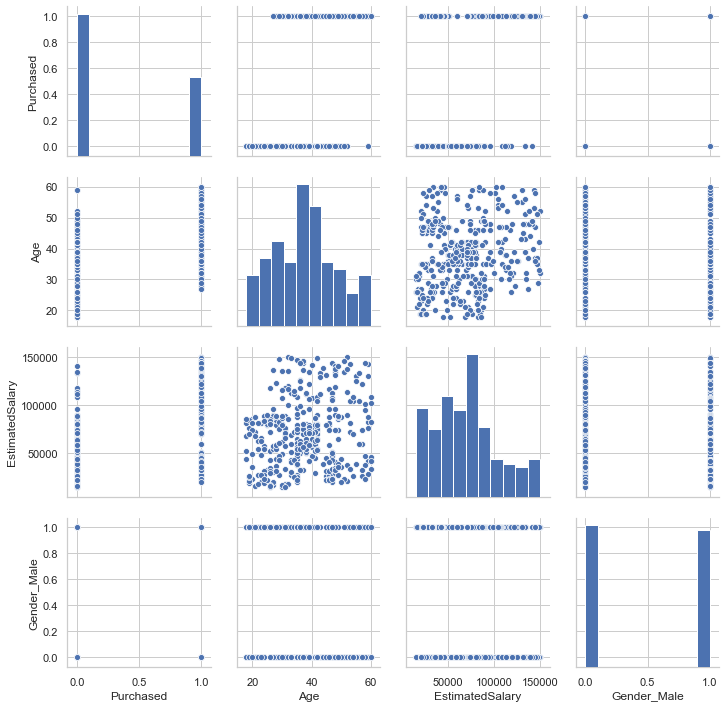

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df)

### Defining the variables and splitting the data

In [15]:
y = df['Purchased']
X = df.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [16]:
X_train.head()

,Age,EstimatedSalary,Gender_Male
37,30,49000,1
91,30,116000,0
394,39,59000,0
191,19,26000,0
51,18,44000,0


## Scaling the features: 

The following step is very important for **Classification** specially for KNN. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In general we need to rescale our variables. If we don't rescale the salary in this example, then the model may always return T or F. We have two options now:

1. Rescale the entire data set using StandardScaler
2. Rescale the individual features.

For KNN it is highly recommended that we use the first method and this is what I will do after splitting the data into train and test. 

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) 

In [18]:
X_train_sc[0:2,:]

array([[-0.71489522, -0.63453974,  1.01892912],
       [-0.71489522,  1.32125842, -0.98142253]])

In [19]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,320.0,37.509375,10.520613,18.0,30.0,37.0,46.0,60.0
EstimatedSalary,320.0,70737.500000,34310.766290,15000.0,45000.0,70000.0,89000.0,150000.0
Gender_Male,320.0,0.490625,0.500695,0.0,0.0,0.0,1.0,1.0


In [20]:
(49000-70737.5)/34310.76629

-0.6335474939927377

###  KNN Classification with Sklearn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Fitting KNN classifier to the Training set

KNN_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train_sc, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [23]:
# Predicting the Test set results
y_pred_test = KNN_classifier.predict(X_test_sc)

### the Confusion Matrix 

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred_test))

[[48  7]
 [ 3 22]]


In [26]:
# defining our own confusion matrix function
from sklearn.metrics import confusion_matrix
def my_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    accuracy = round((TP+TN) / (TP+ FP+ FN+ TN) ,2)
    precision = round( TP / (TP+FP),2)
    recall = round( TP / (TP+FN),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : 0 ','Actual : 1'], columns=['Predict : 0','Predict :1 '])
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print("-----------------------------------------")
    return cm_labled
 

In [27]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted red, how many are actually red (incorporating FP: type I error)
# recall: how many of the red dots we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_pred_test)



Accuracy = 0.88
Precision = 0.76
Recall = 0.88
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,48,7
Actual : 1,3,22


###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [28]:
from sklearn.model_selection import cross_val_score

In [31]:
# remember we saved our model in an object called "KNN_classifier"
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train_sc, y = y_train, cv = 10 , scoring="accuracy" )

# How do you fix the warning? 

In [32]:
accuracy

array([1.        , 0.96969697, 0.9375    , 0.84375   , 0.9375    ,
       0.8125    , 0.9375    , 0.875     , 0.96774194, 0.93548387])

In [33]:
round(accuracy.mean(),3)

0.922

In [34]:
round(accuracy.std(),3)

0.056

## Choosing K
 
Let's start with a simple error rate approach in the test set!

In [35]:
error_rate = []
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train_sc, y_train)
    error_rate.append(np.mean(y_test != KNN_i.predict(X_test_sc)) )


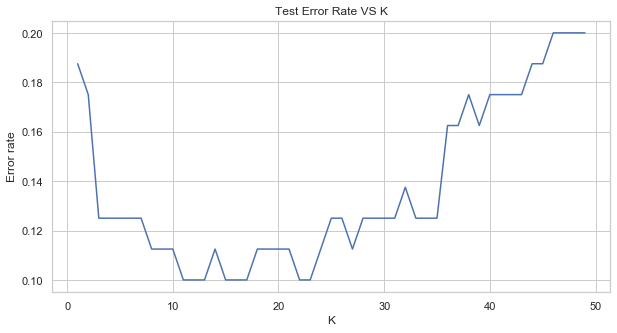

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate, x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [39]:
my_confusion_matrix(y=y_test, y_hat=KNeighborsClassifier(n_neighbors=11).fit(X_train_sc,y_train).predict(X_test_sc))



Accuracy = 0.9
Precision = 0.79
Recall = 0.92
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,49,6
Actual : 1,2,23


### What is wrong with our simple error_rate approach?
Do you happen to observe the test data? We need to use cross validation to avoid this issue.

In [40]:
test_error_rate = []
CV_error_rate=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train_sc, y_train)
    MAE_i =  -1*cross_val_score(estimator = KNN_i, X = X_train_sc, y = y_train, cv = 5 , scoring="neg_mean_absolute_error" )
    CV_error_rate.append(np.mean(MAE_i))
    test_error_rate.append(np.mean(y_test != KNN_i.predict(X_test_sc)) )
    
optimal_k = pd.DataFrame({'CV_error_rates': CV_error_rate, 'test_error_rates':test_error_rate}, index=range(1,k))

In [41]:
optimal_k.head()

,CV_error_rates,test_error_rates
1,0.100214,0.1875
2,0.131422,0.1750
3,0.084586,0.1250
4,0.078236,0.1250
5,0.071887,0.1250


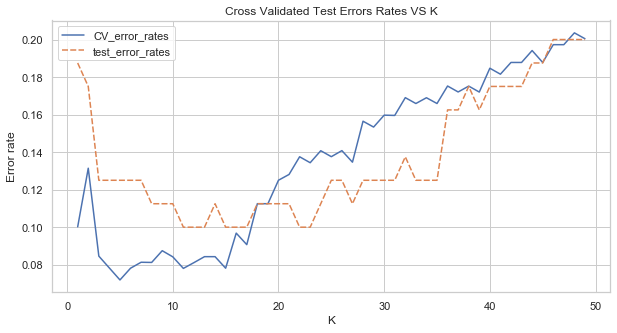

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

By looking at this graph, what is the lesson learned?
What is the optimal K?

---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [43]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting KNN classifier to the Training set

In [45]:

KNN_classifier = KNeighborsClassifier(n_neighbors=9)
KNN_classifier.fit(X_train, y_train.values.reshape(-1,))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [46]:
# Predicting the Test set results
y_pred = KNN_classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


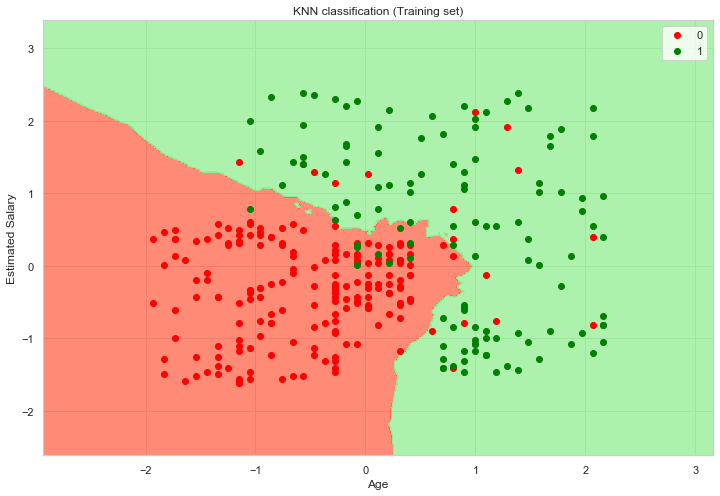

In [47]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , KNN_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


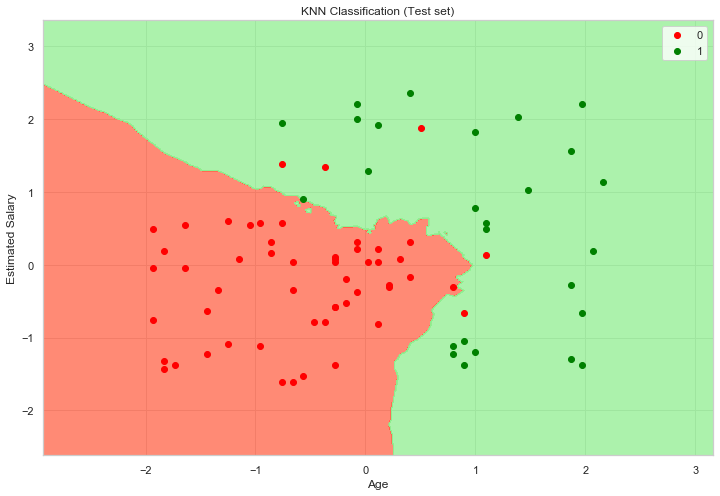

In [48]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, KNN_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [49]:
print(confusion_matrix(y_test, y_pred))

[[49  5]
 [ 0 26]]


In [50]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted green (positive), how many are actually green (incorporating FP: type I error)
# recall: how many of the Green dots (True positives) we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_pred)



Accuracy = 0.94
Precision = 0.84
Recall = 1.0
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,49,5
Actual : 1,0,26


-------------
### Exercise 1 : 

What if I don't have access to the test set? How can estimate the test accuracy? Recall? or precission? 

In [51]:
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train.values.reshape(-1,), cv = 10 , scoring="accuracy" )

In [52]:
accuracy.mean()

0.9091184017595308

In [53]:
recall = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train.values.reshape(-1,), cv = 10 , scoring="recall" )

In [54]:
recall.mean()

0.9045454545454545

In [55]:
precision = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train.values.reshape(-1,), cv = 10 , scoring="precision" )

In [56]:
precision.mean()

0.8559324009324009

---
### Exercise 2: 
What is the optimal K in this example?

In [57]:
KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train.values.reshape(-1,))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

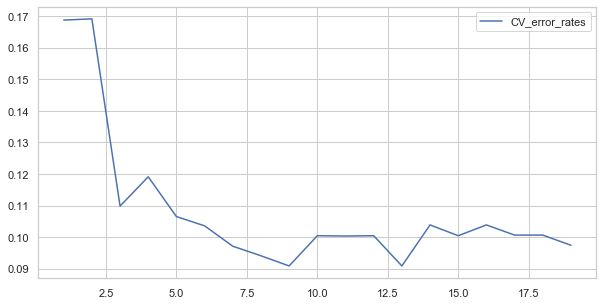

In [58]:
error_rate = []
CV_error_rate=[]
k=20

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train.values.reshape(-1,))
    MAE_i =  -1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train.values.reshape(-1,), cv = 10 , scoring="neg_mean_absolute_error" )
    CV_error_rate.append(np.mean(MAE_i))
    
optimal_k = pd.DataFrame({'CV_error_rates': CV_error_rate}, index=range(1,k))

plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.show()

## More reports

In [59]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_fscore_support, precision_recall_curve

In [60]:
# for example, let's take a look at classification_report
# for more information, read additional links number 2, and 3.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



###  Additional links:
1. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
2. Performance measures (1): https://en.wikipedia.org/wiki/Confusion_matrix
3. Performance measures (2): https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/ 
4. ROC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html